### 4.Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [21]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터
mpg =sns.load_dataset('mpg')          #mile per gallon 데이터

- 1차원 분포

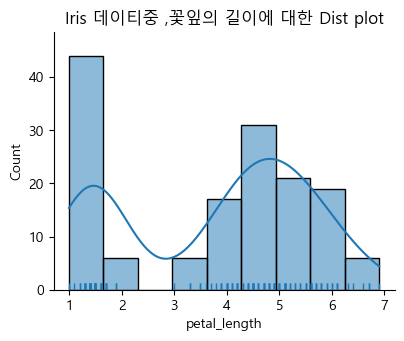

In [22]:
# distpolt(distribution plot) 분포 그림,Seaborn 라이브러리의 함수입니다
#x: 이 매개변수는 플롯하려는 DataFrame의 열을 지정합니다. 
#rug: 이 매개변수는 데이터세트의 각 관측치에 대해 "눈금"이라는 작은 수직선을 그릴지 여부를 제어합니다. 
#kde: 이 매개변수는 히스토그램에 커널 밀도 추정(KDE) 곡선을 그릴지 여부를 제어합니다.

fig=sns.displot(x='petal_length',rug=True,kde=True,data=iris)
fig.fig.set_size_inches(4,3)
plt.title('Iris 데이티중 ,꽃잎의 길이에 대한 Dist plot')
plt.show()

- 카운트 플롯

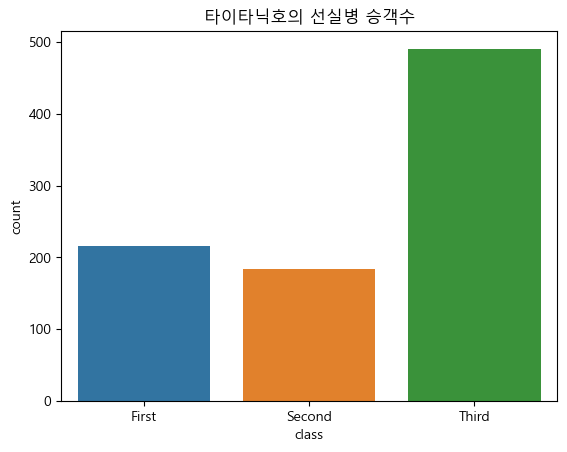

In [23]:
sns.countplot(x='class',data=titanic)
plt.title('타이타닉호의 선실병 승객수')
plt.show()

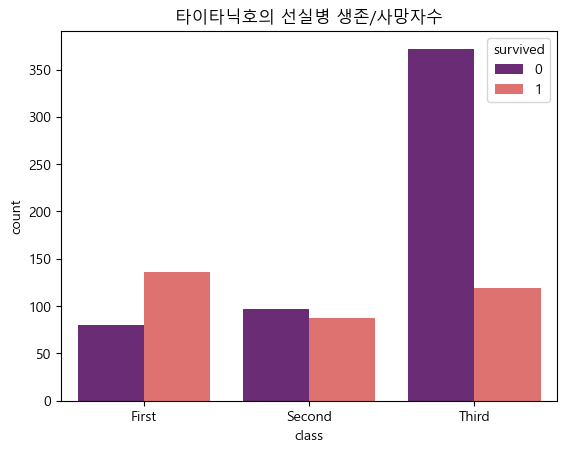

In [24]:
#그룹핑
sns.countplot(x='class',hue='survived',data=titanic,palette='magma') # palette,hue따라서 그림을 다르게
plt.title('타이타닉호의 선실병 생존/사망자수')
plt.show()

- 2차원 실수 데이터

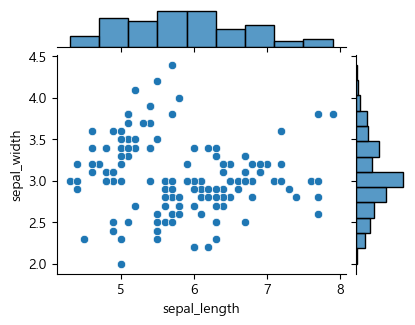

In [25]:
#joint plot
fig=sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
fig.fig.set_size_inches(4,3)
plt.show()

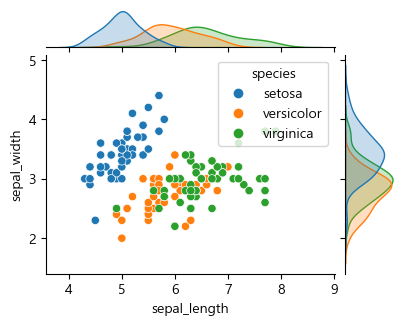

In [26]:
#joint plot를 좀더 세련되게
fig=sns.jointplot(x='sepal_length',y='sepal_width',hue='species',data=iris)
fig.fig.set_size_inches(4,3)
plt.show()

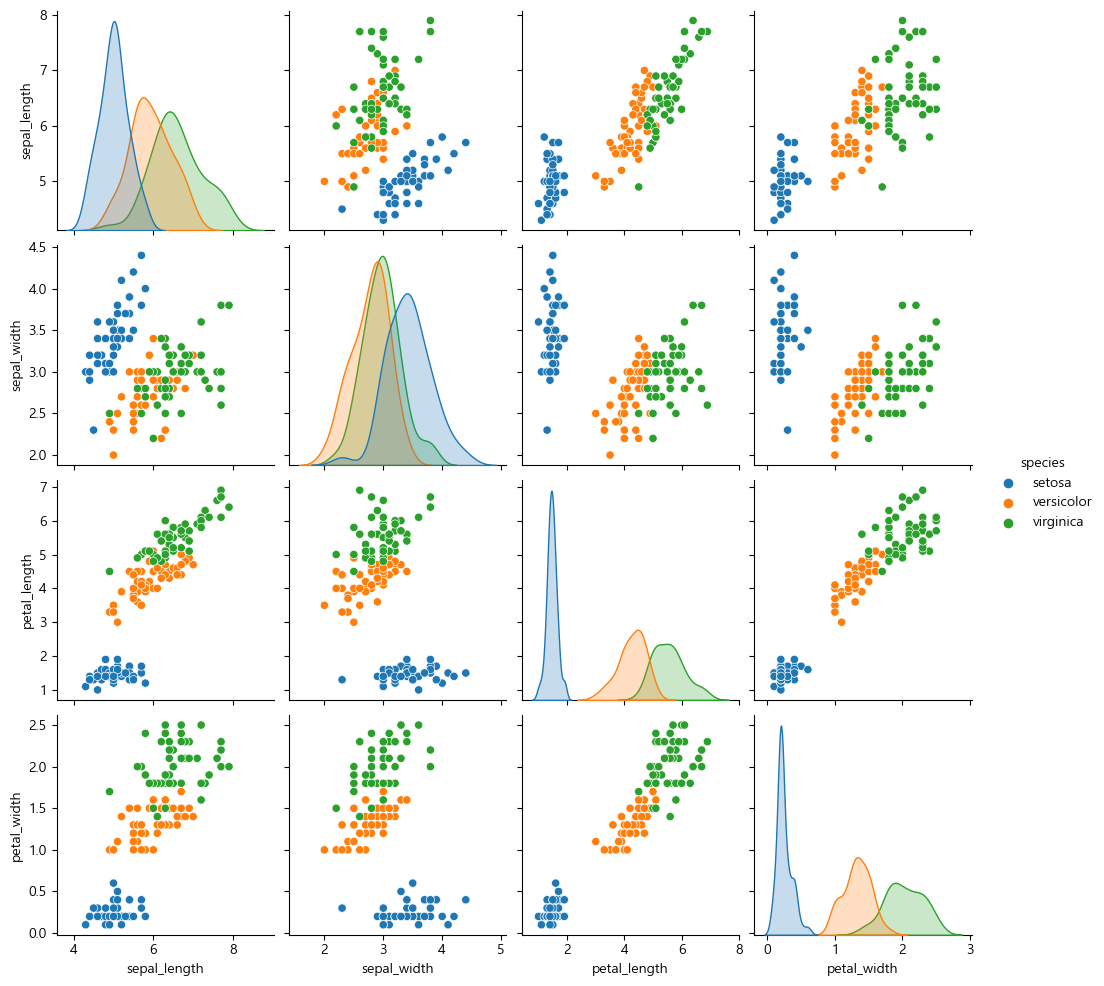

In [27]:
#pair plot
sns.pairplot(hue='species',data=iris)      #plt.show() 안쓰고 ; 써도됨
plt.show()


- 다차원 카테고리 데이터

In [28]:
#heatmap
dt = titanic.pivot_table('survived','class','sex','count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


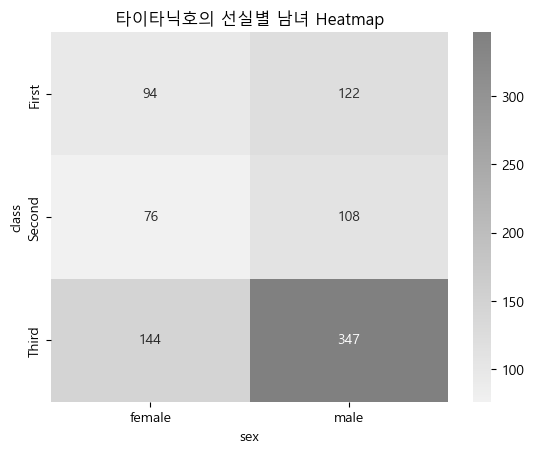

In [29]:
sns.heatmap(dt, cmap=sns.light_palette("gray", as_cmap=True),
            annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 Heatmap')
plt.show()

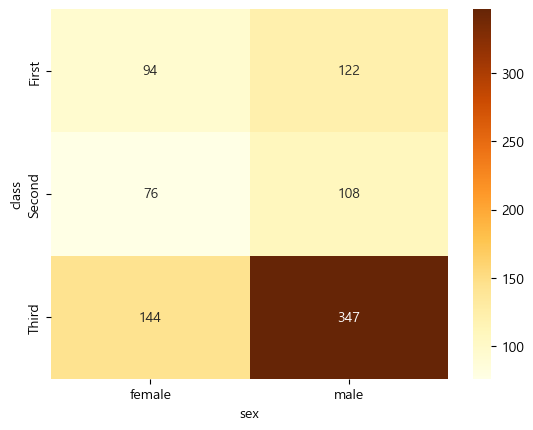

In [30]:
sns.heatmap(dt,cmap='YlOrBr',annot=True,fmt='d')
plt.title=('타이타닉호의 선실별 남녀 heatmap');

In [31]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


TypeError: 'str' object is not callable

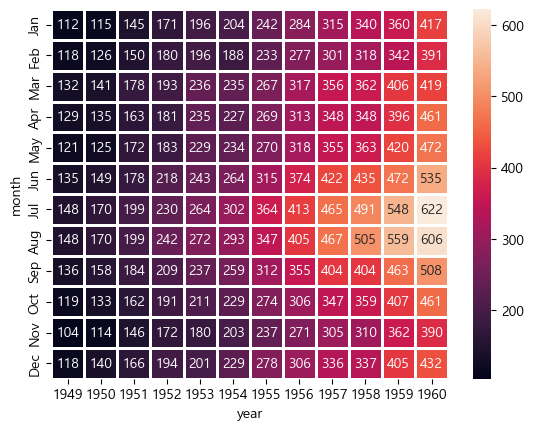

In [32]:
passengers = flights.pivot(index='month',columns='year',values='passengers')
sns.heatmap(passengers,annot=True,fmt='d',linewidths=1)
plt.title('연도별,월별 비행기 승객수');

- 다차원 복합 데이터(2차원)

TypeError: 'str' object is not callable

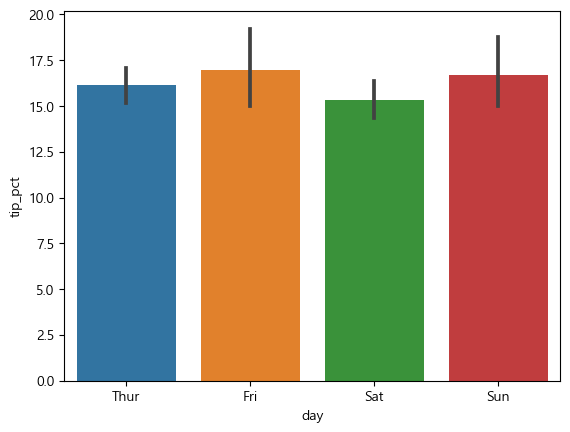

In [ ]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)
sns.barplot(x ='day', y='tip_pct',data=tips)
plt.title('요일별 팁 평균');

In [ ]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
#제조사만 가져오기
mpg['manufacturer'] =mpg.name.apply(lambda x : x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


TypeError: 'str' object is not callable

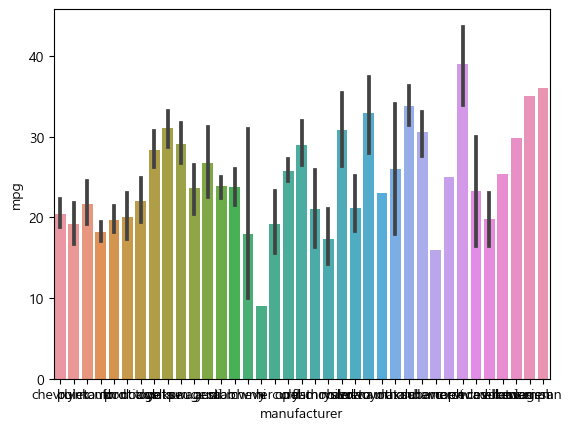

In [ ]:

sns.barplot(x = 'manufacturer',y='mpg',data=mpg)
plt.title('제조사별 평균 MPG');

TypeError: 'str' object is not callable

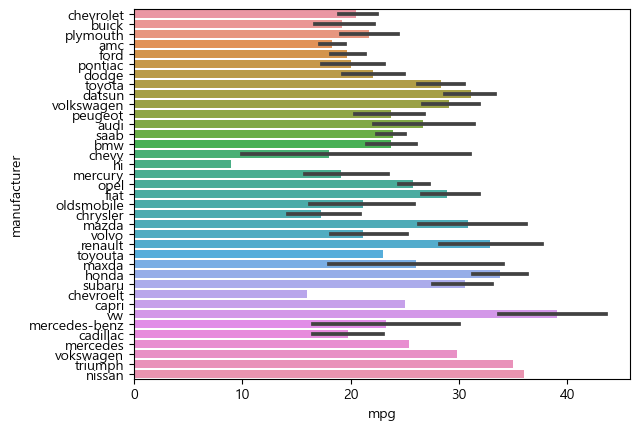

In [ ]:
# x와 y를 바꿔주면 수평막대그래프가 됨
sns.barplot(y = 'manufacturer',x='mpg',data=mpg)
plt.title('제조사별 평균 MPG');

- boxplot

AttributeError: 'Axes' object has no attribute 'fig'

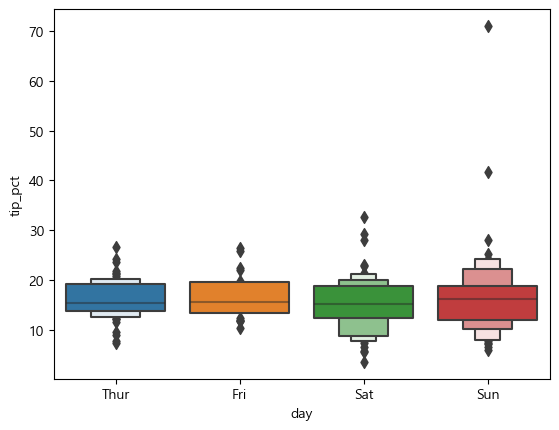

In [ ]:
#요일별 팁의 비율
sns.boxenplot(x='day',y='tip_pct',data=tips)
plt.title('요일별 팁 비율에 대한 boxplot');

TypeError: 'str' object is not callable

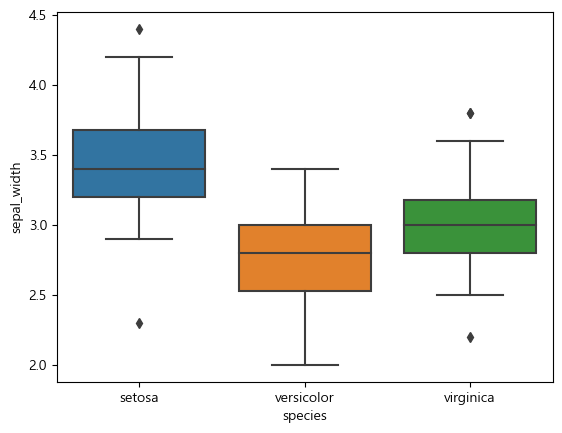

In [ ]:
# iris 
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris 품종별 Sepal width');

<Axes: >

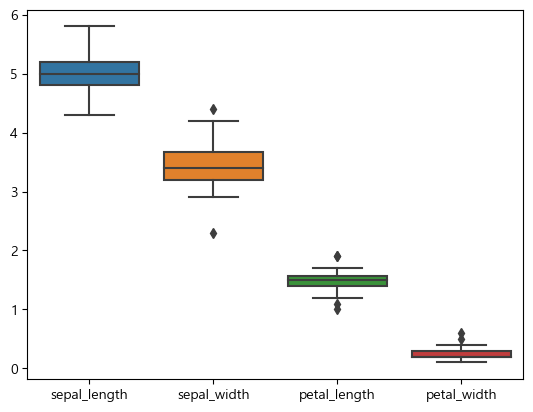

In [ ]:
sns.boxplot(data=iris[iris.species == 'setosa'])

TypeError: 'str' object is not callable

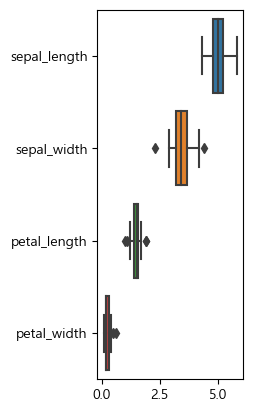

In [ ]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=iris[iris.species == species], orient='horizontal')
    plt.title(species)
plt.show()

- regpolt

In [ ]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


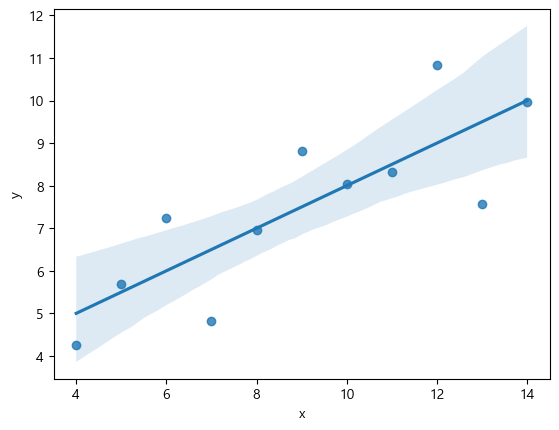

In [ ]:
sns.regplot(x='x',y='y',data=ans[ans.dataset == 'I']);

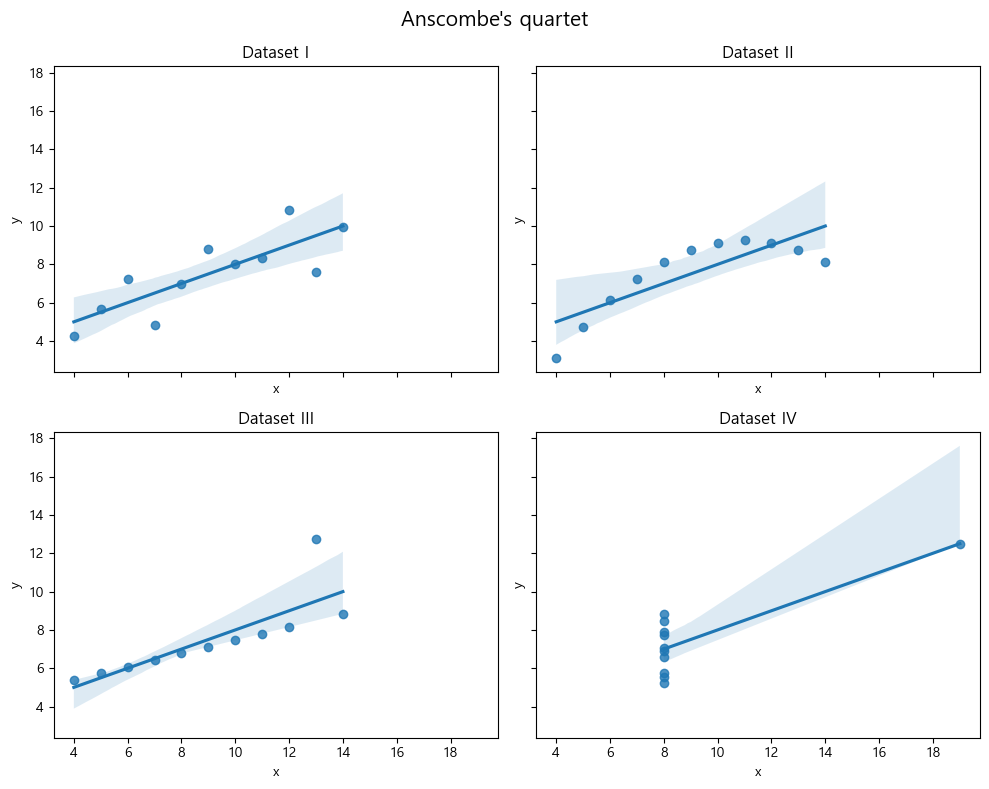

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(10,8),sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    row, col = i // 2, i % 2
    ax =axes[i //2,i % 2]
    
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=ax)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's quartet",fontsize =15)
plt.tight_layout()
plt.show()

- 1) Titanic
    - embark-town ,sex 생존율
    - 나이 = displot
- 2) CCTV
    - 자치구 법정준
    - 자치구 이름
    - cctv 갯수

In [17]:
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
dt = titanic.pivot_table('survived','embark_town','sex')
dt

sex,female,male
embark_town,,
Cherbourg,0.876712,0.305263
Queenstown,0.750000,0.073171
Southampton,0.689655,0.174603


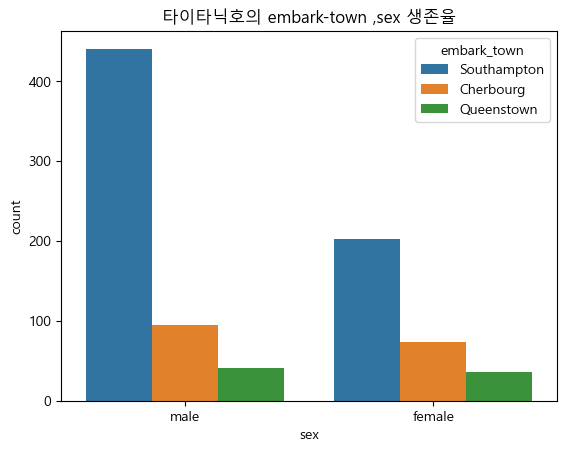

In [23]:
sns.countplot(x='sex', hue='embark_town', data=titanic)
plt.title('타이타닉호의 embark-town ,sex 생존율')
plt.show()

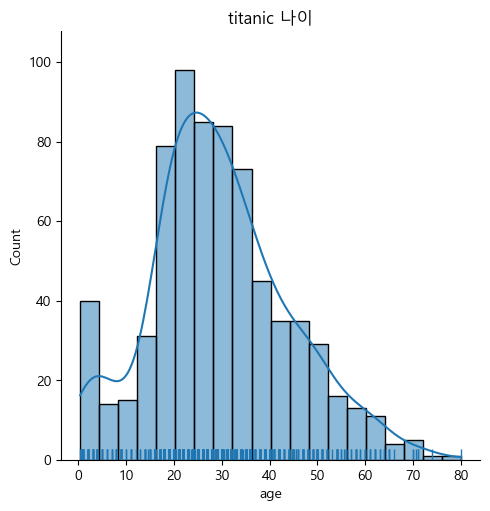

In [25]:
sns.displot(x='age',rug=True,kde=True,data=titanic)
plt.title('titanic 나이')
plt.show()

In [28]:
pail='../02.Pandas/과제/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준 copy.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(pail, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.head()

,구분,총계
0,계,91341
1,종로구,1980
2,중 구,2584
3,용산구,2847
4,성동구,4047


In [29]:
cctv.drop([0],inplace=True)
cctv.set_index('구분',inplace=True)
cctv.head()

,총계
구분,
종로구,1980
중 구,2584
용산구,2847
성동구,4047
광진구,3480


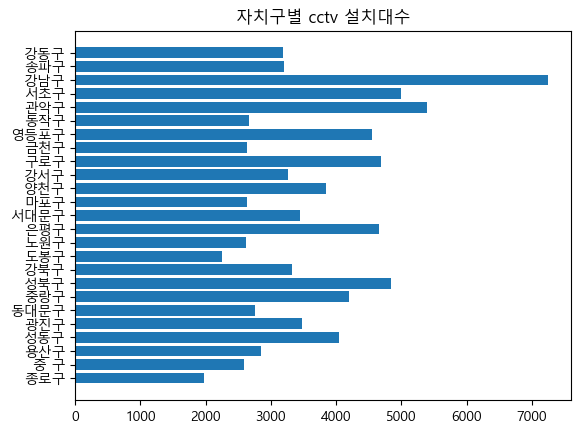

In [30]:
plt.barh(cctv.index,cctv.총계)
plt.title('자치구별 cctv 설치대수')
plt.show()

In [31]:

#--- 17. 퀴즈
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


<function matplotlib.pyplot.show(close=None, block=None)>

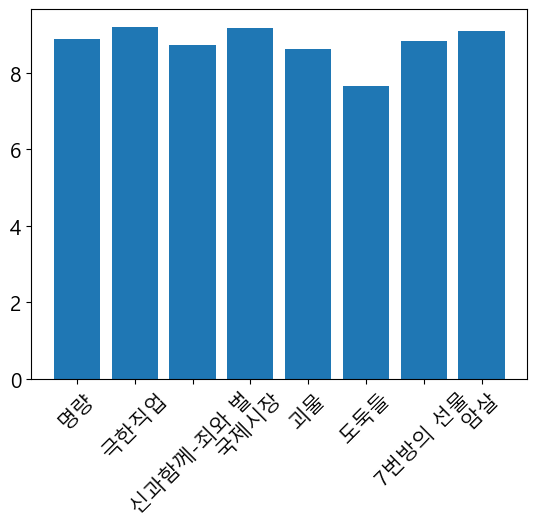

In [35]:
plt.bar(df['영화'],df['평점'])
plt.show

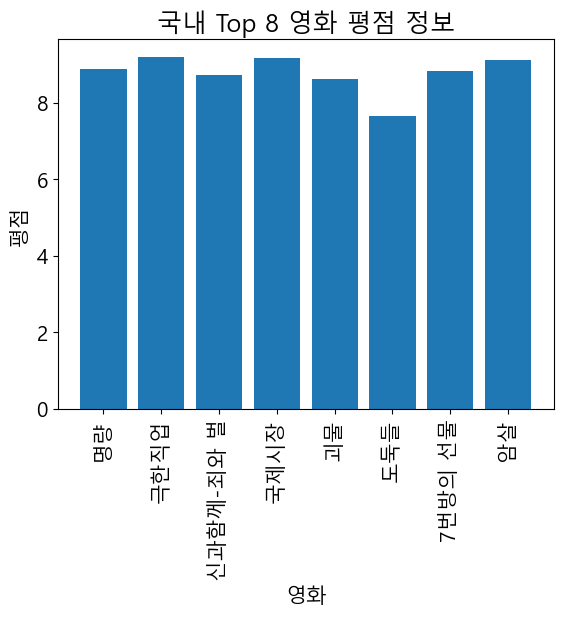

In [39]:
plt.bar(df['영화'],df['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xticks(rotation =90)
plt.xlabel('영화')
plt.ylabel('평점')
plt.show()

In [40]:
df_group = df.groupby('개봉 연도').mean()
df_group

C:\Users\Admin\AppData\Local\Temp\ipykernel_4296\97881728.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group =df.groupby('개봉 연도').mean()


,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


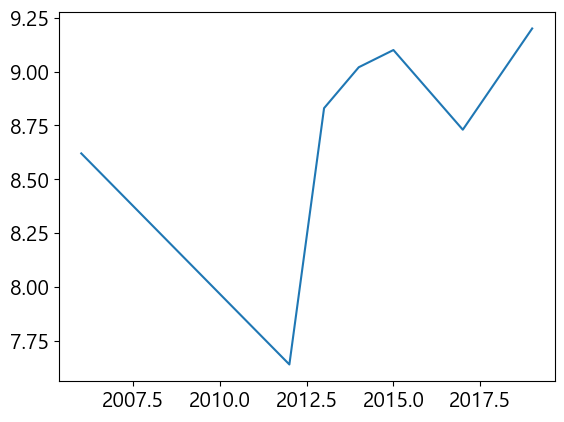

In [52]:
plt.plot(df_group.index, df_group['평점'])
plt.show()

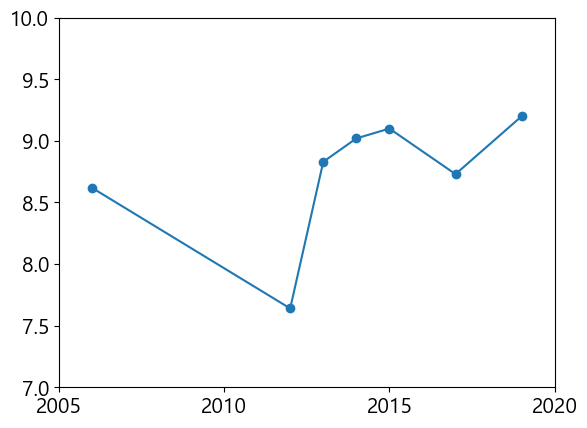

In [60]:
plt.plot(df_group.index, df_group['평점'], marker='o')
plt.xticks([2005,2010,2015,2020])
plt.ylim(7,10)
plt.show()

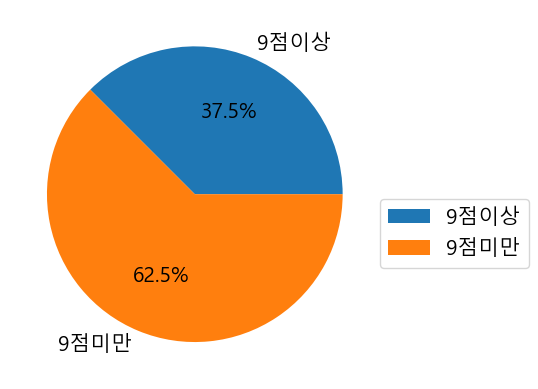

In [80]:
filt =df['평점'] >=9.0
values=[len(df[filt]),len(df[~filt])]
labels =['9점이상','9점미만']
plt.pie(values,labels=labels,autopct ='%.1f%%')
plt.legend(loc=(1,0.3))
plt.show()